# Data Mining - Analyse

In [1]:
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (11,7)

In [3]:
data = pd.read_csv('final_data.csv', index_col=0)
checkings = data.copy()
data.shape

(38405, 40)

## Pre-processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38405 entries, 0 to 38404
Data columns (total 40 columns):
url                                    38405 non-null object
shares                                 38405 non-null int64
content                                38405 non-null object
author_name                            38405 non-null object
title                                  38405 non-null object
nb_images                              38405 non-null int64
num_videos                             38405 non-null float64
num_hrefs                              38405 non-null float64
num_keywords                           38405 non-null float64
chanel                                 38405 non-null object
date                                   38405 non-null object
day                                    38405 non-null object
week                                   38405 non-null int64
Topic_nmf other                        38405 non-null float64
Topic_nmf family and job            

Nous avons déjà des variables pour différencier les jours de la semaine et différencier les weeks-end du reste de la semaine. Nous ajoutons une variable `month` pour les mois (inutile pour les années car seulement deux années différentes), puis on convertit `month`et `week` en variable catégorielle.

In [5]:
data.loc[:, 'date'] = pd.to_datetime(data.loc[:, 'date'])
data['month'] = data['date'].dt.month
data = data.astype({'month': 'object', 'week': 'object'})

Pour réduire le nombre total de catégories, on remplace le nom des auteurs par `noname` quand ce dernier ne fait pas partie des 9 auteurs ayant écrit le plus d'articles. On réduit ainsi le nombre d'auteurs différents à 10 (au lieu de plus de 1100) tout en gardant l'information relative à l'auteur pour 11083 articles.

In [6]:
top_authors = data.author_name.value_counts().index[:9]
print(sum(data.author_name.value_counts()[:9]))
data.loc[~data.author_name.isin(top_authors), 'author_name'] = 'Noname'
data.author_name.value_counts()

11083


Noname                           27322
Neha Prakash                      1499
Sam Laird                         1458
Stan Schroeder                    1443
Todd Wasserman                    1287
Seth Fiegerman                    1267
Brian Anthony Hernandez           1233
Samantha Murphy                   1093
Lorenzo Franceschi-Bicchierai      977
Laura Vitto                        826
Name: author_name, dtype: int64

On retire les variables `url`, `content`, `lemmatized` et `date` :

In [7]:
data = data.drop(labels=['url','title','content','lemmatized','date'], axis=1)
print(data.shape)
print(data.isnull().sum())
print(sum(data.duplicated()))

(38405, 36)
shares                                 0
author_name                            0
nb_images                              0
num_videos                             0
num_hrefs                              0
num_keywords                           0
chanel                                 0
day                                    0
week                                   0
Topic_nmf other                        0
Topic_nmf family and job               0
Topic_nmf web                          0
Topic_nmf apple                        0
Topic_nmf twitter                      0
Topic_nmf facebook                     0
Topic_nmf musics and videos            0
Topic_nmf photography                  0
Topic_nmf business                     0
Topic_nmf google                       0
dominant_topic                         0
Topic_nmf devices telecomunication     0
Topic_nmf politics and society         0
Topic_nmf sport and gaming             0
Topic_lda Politics and diplomacy       0
Topi

## Analyse descriptive (à compléter par @Romain)

### Variables relatives à l'analyse des sentiments

Déjà fait par @Bourega.

### Variables relatives aux thèmes

Pour l'analyse des variables relatives au sentiment analysis, voir overleaf partie sentiment analysis. \
Pour ce qui est des thèmes. Le thème LDA le plus récurrent est Entertainment, le thème NMF le plus récurrent est other, juste devant Politics and society. On remarque également que les classements sont globalement cohérents entre les deux méthodes. Par exemple : sur les 4332 articles classés 'devices telecom' par l'algo NMF, 3265 le sont aussi par l'algo LDA (soit plus de 75%). En revanche, lorsque le thème LDA est trop large (par exemple Entertainment), le thème NMF permet d'obtenir une information plus précise.

In [266]:
print(data.dominant_topic_lda.value_counts())

Entertainment                13267
Internet and social media    10455
Politics and diplomacy        7417
Telecomunication devices      7049
Videos and movies              217
Name: dominant_topic_lda, dtype: int64


In [267]:
print(data.dominant_topic.value_counts())

politics and society        6128
other                       5690
musics and videos           5114
devices telecomunication    4351
business                    3750
sport and gaming            3321
twitter                     2140
web                         2120
google                      1651
facebook                    1627
apple                       1366
photography                  781
family and job               366
Name: dominant_topic, dtype: int64


In [268]:
cross_topic = pd.crosstab(data['dominant_topic_lda'], 
                            data['dominant_topic'],  
                               margins ='column') 
cross_topic

dominant_topic,apple,business,devices telecomunication,facebook,family and job,google,musics and videos,other,photography,politics and society,sport and gaming,twitter,web,All
dominant_topic_lda,,,,,,,,,,,,,,
Entertainment,108,162,266,303,228,163,3389,4274,465,449,2368,852,240,13267
Internet and social media,382,2975,713,1152,38,782,756,661,26,613,213,1048,1096,10455
Politics and diplomacy,31,262,98,88,85,107,449,501,139,5016,206,197,238,7417
Telecomunication devices,843,343,3272,79,13,599,459,187,150,26,495,37,546,7049
Videos and movies,2,8,2,5,2,0,61,67,1,24,39,6,0,217
All,1366,3750,4351,1627,366,1651,5114,5690,781,6128,3321,2140,2120,38405


### Analyse globale des corrélations

Pour ce qui est de l'analyse des corrélations, on remarque que aucune corrélation (linéaire ou non) ne dépasse le seuil de 0.6 en valeur absolue, si ce n'est pour les variables relative à l'analyse de sentiment lorsqu'elles sont présentes à la fois en valeur et en valeur absolue (ce qui est logique).

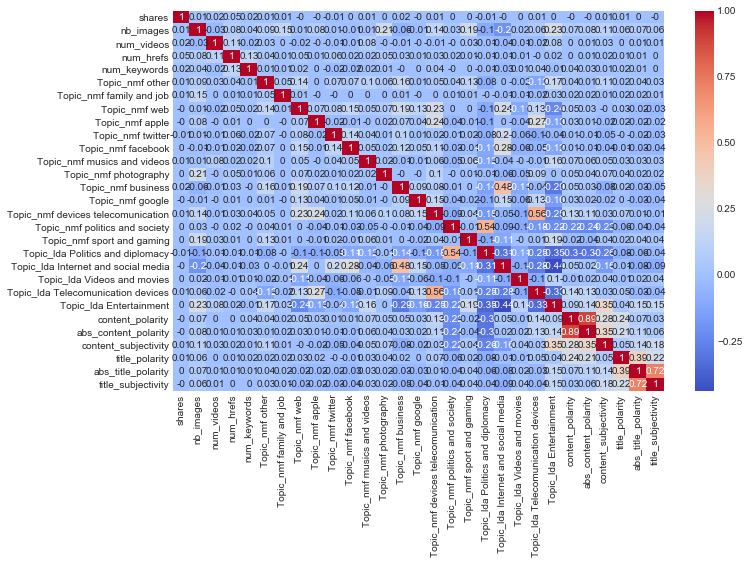

In [269]:
corrMatrix = data.select_dtypes(exclude='object').corr(method='pearson').round(decimals=2)
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()
plt.rcParams['figure.figsize'] = (15,15)

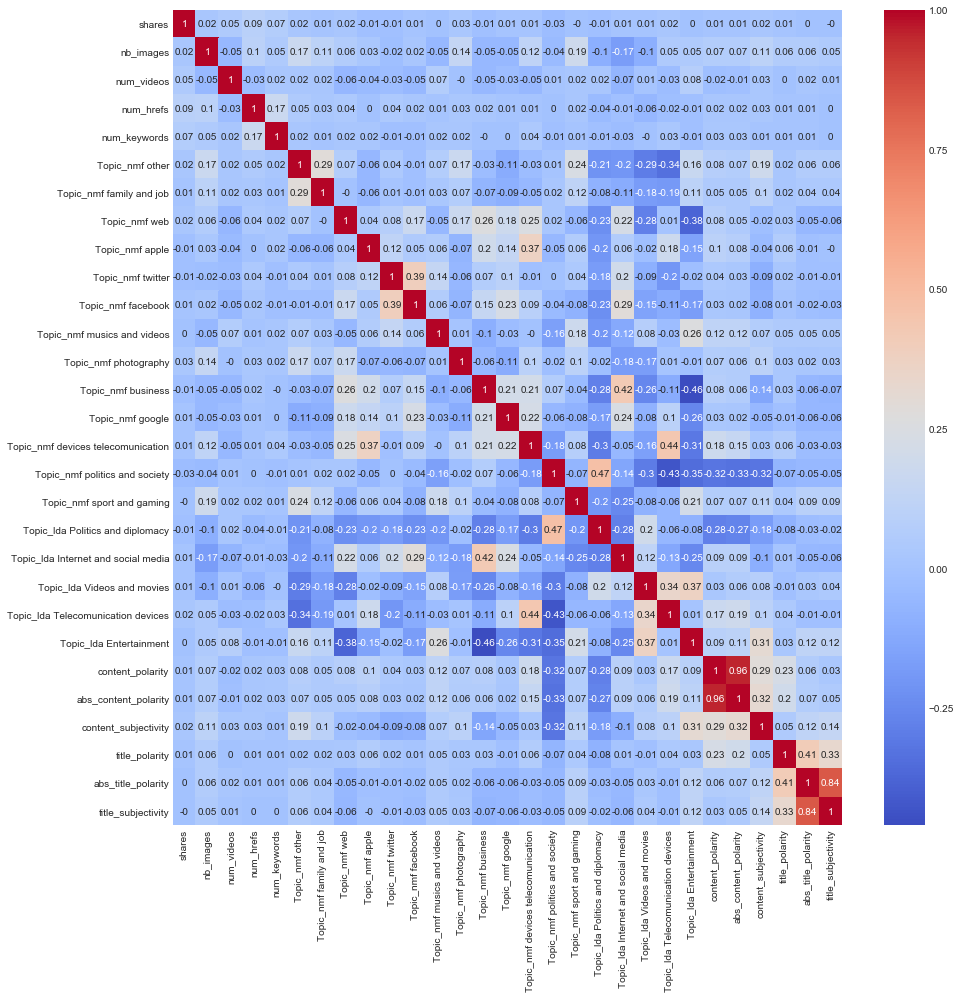

In [270]:
corrMatrix = data.select_dtypes(exclude='object').corr(method='spearman').round(decimals=2)
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

### Description de la variable cible :

In [129]:
data['shares'].describe(percentiles=np.arange(0.1, 1, 0.1))

count     38405.000000
mean       3375.151829
std       11252.838523
min           5.000000
10%         708.000000
20%         870.000000
30.0%      1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
80%        3400.000000
90%        6200.000000
max      843300.000000
Name: shares, dtype: float64

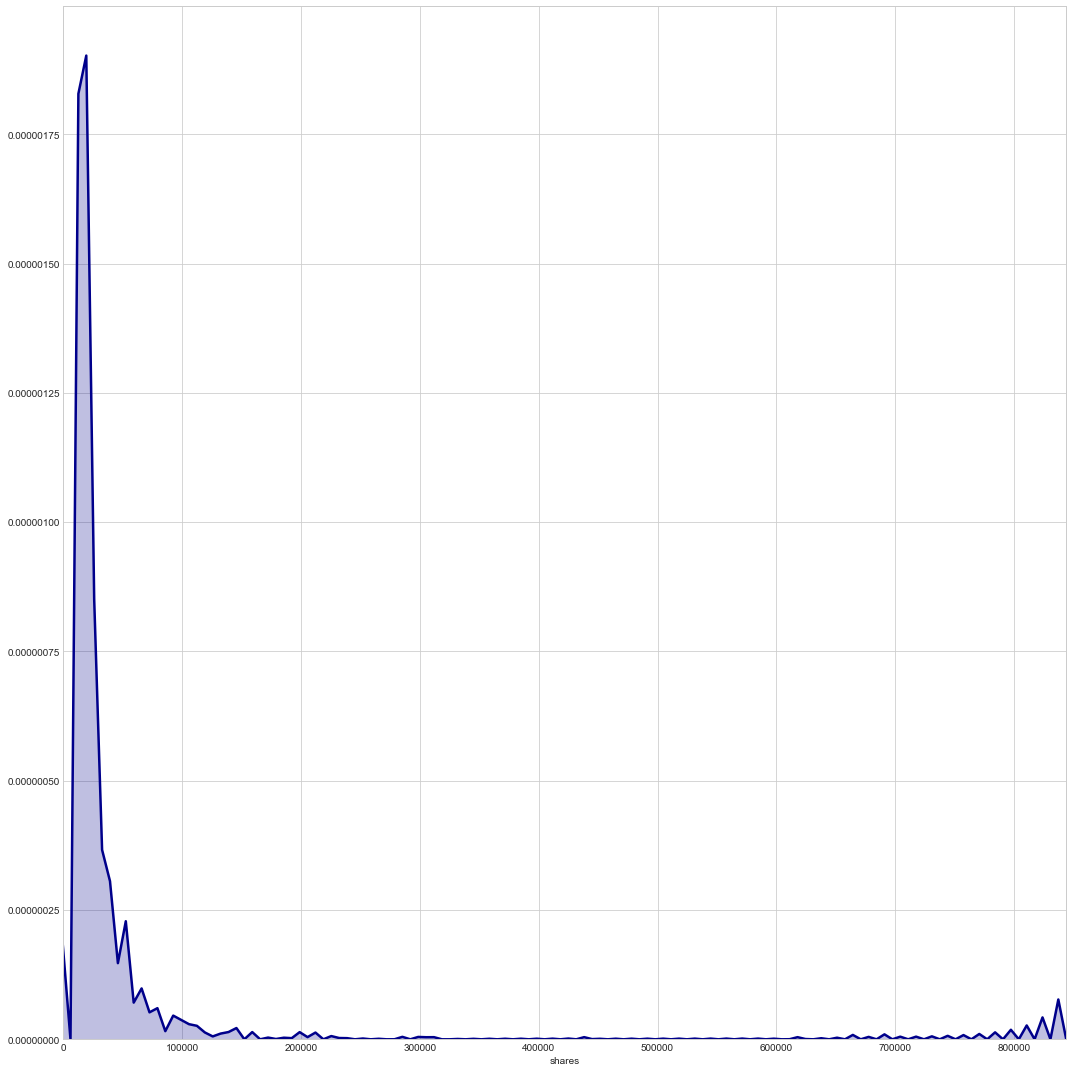

In [273]:
sns.distplot(data['shares'], hist = False, kde_kws = {'shade': True, 'linewidth': 2.5},
            color = 'darkblue')
plt.xlim(0, data['shares'].max()+2)
plt.tight_layout()
plt.show()

On observe une distribution avec un skewness bien supérieur à 0. 80% des articles ont un nombre de partages inférieur à la moyenne. On passe au logarithme naturel pour avoir une distribution plus lisse et moins asymétrique.

In [163]:
log_shares = np.log(data['shares'])
stats.describe(log_shares)

DescribeResult(nobs=38405, minmax=(1.6094379124341003, 13.645078045562732), mean=7.47356418591649, variance=0.8608709440374486, skewness=1.0421891028839523, kurtosis=2.280520162910814)

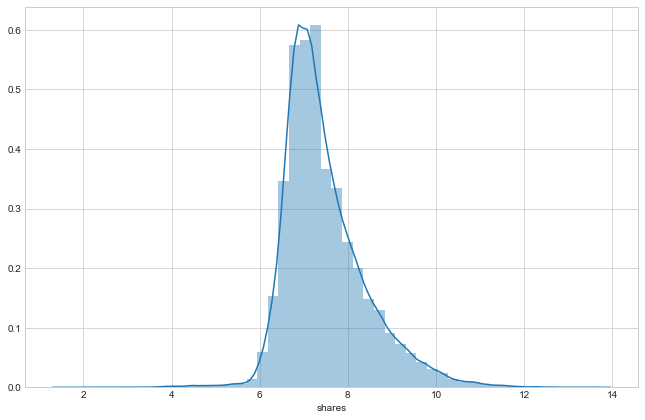

In [164]:
sns.distplot(log_shares)

### Lien entre la cible et les variables quantitatives

On mesure le lien entre la cible et les variables quantitatives à l'aide des coefficients de corrélation de Pearson et Spearman.

In [15]:
pearson_corr = dict.fromkeys(data.select_dtypes(exclude='object').columns)
for key in pearson_corr.keys() :
    corr = abs(stats.pearsonr(data['shares'],data[key])[0])
    pearson_corr[key] = corr
del pearson_corr['shares']
pearson_corr = {k: v for k, v in sorted(pearson_corr.items(), key=lambda item: item[1])}

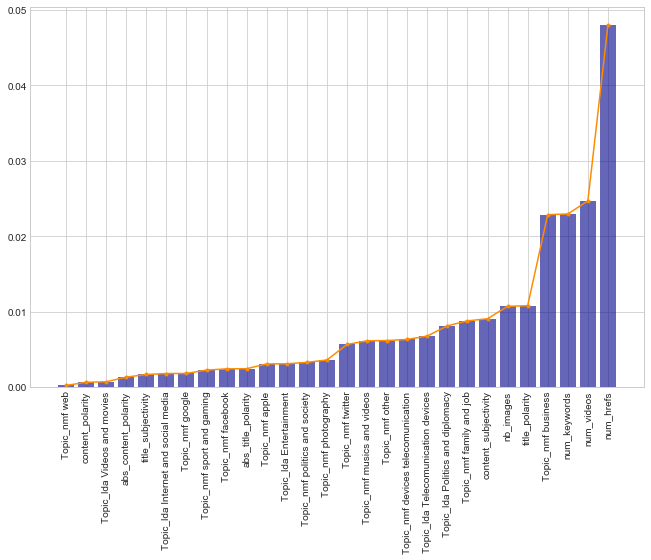

In [16]:
plt.bar(range(len(pearson_corr)), list(pearson_corr.values()), align='center', color = 'darkblue', alpha= 0.6)
plt.plot([i-1 for i in range(1,29)], list(pearson_corr.values()),
                  linestyle='-', marker='.', color = 'darkorange')
plt.xticks(range(len(pearson_corr)), list(pearson_corr.keys()), rotation = 90)
plt.show()

In [264]:
spearman_corr = dict.fromkeys(data.select_dtypes(exclude='object').columns)
for key in spearman_corr.keys() :
    corr = abs(stats.spearmanr(data['shares'],data[key])[0])
    spearman_corr[key] = corr
del spearman_corr['shares']
spearman_corr = {k: v for k, v in sorted(spearman_corr.items(), key=lambda item: item[1])}

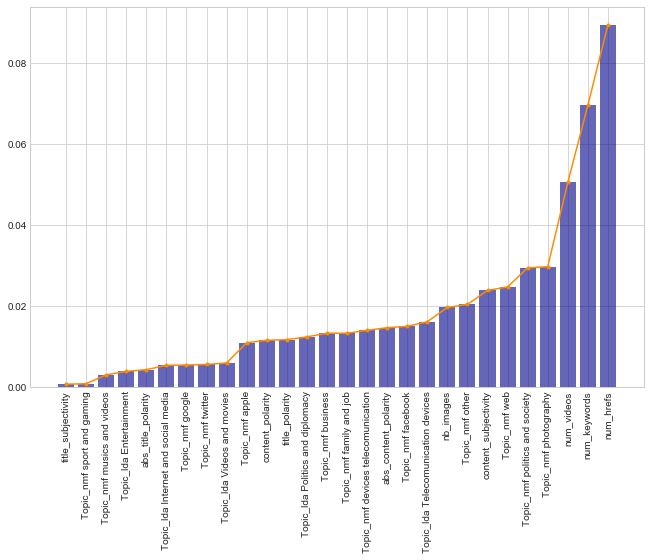

In [265]:
plt.bar(range(len(spearman_corr)), list(spearman_corr.values()), align='center', color = 'darkblue', alpha= 0.6)
plt.plot([i-1 for i in range(1,29)], list(spearman_corr.values()),
                  linestyle='-', marker='.', color = 'darkorange')
plt.xticks(range(len(spearman_corr)), list(spearman_corr.keys()), rotation = 90)
plt.show()

Quelle que soit la mesure de corrélation retenue, on peut observe un "coude" au-delà de la valeur 0.02 (ce qui est très faible).

### Lien entre la cible et les variables qualitatives

On mesure le lien entre ien entre la cible et les variables qualitatives à l'aide du test de Kruskall-Wallis et de la statistique de test associée. Pour rappel, une valeur élevée de la statistique indique qu’il existe une forte liaison entre la variable qualitative et la variable cible. \

## Classification

Voir notebook discretisation. Au final, aucune des méthodes par algorithme utilisées ne fournit des résultats satisfaisant. En effet, soit la variable cible est discrétisée en un nombre trop important de classes, soit le seuil choisi est trop important de sorte que les classes créées sont déséquilibrées. Par conséquent, nous décidons d'opérer une discrétisation par quantile en utilisant la médiane. \
Dans ce qui suit, nous désignons la variable cible par $Y$ et les variables explicatives par $X$.

### Création de la nouvelle variable cible et des échantillons d'apprentissage et de test

In [8]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [252]:
ml_dataset = data.copy()
ml_dataset['target'] = np.where((ml_dataset['shares'] > 1400), 1, 0)
ml_dataset.target.value_counts()

0    19489
1    18916
Name: target, dtype: int64

In [253]:
del ml_dataset['shares']
ml_dataset = ml_dataset.astype({'week': 'int'})

In [254]:
ml_dataset_encoded = ml_dataset.join(pd.get_dummies(ml_dataset['author_name'], prefix='author_name'))
ml_dataset_encoded = ml_dataset_encoded.join(pd.get_dummies(ml_dataset['chanel'], prefix='chanel'))
ml_dataset_encoded = ml_dataset_encoded.join(pd.get_dummies(ml_dataset['day'], prefix='day'))
ml_dataset_encoded = ml_dataset_encoded.join(pd.get_dummies(ml_dataset['dominant_topic'], 
                                                            prefix='dominant_topic'))
ml_dataset_encoded = ml_dataset_encoded.join(pd.get_dummies(ml_dataset['dominant_topic_lda'], 
                                                    prefix='dominant_topic_lda'))
ml_dataset_encoded = ml_dataset_encoded.join(pd.get_dummies(ml_dataset['month'], prefix='month'))
ml_dataset_encoded = ml_dataset_encoded.drop(labels=['author_name', 'chanel', 'day', 'dominant_topic',
       'dominant_topic_lda', 'month'], axis=1)
print(ml_dataset_encoded.shape)
ml_dataset_encoded.head()

(38405, 85)


,nb_images,num_videos,num_hrefs,num_keywords,week,Topic_nmf other,Topic_nmf family and job,Topic_nmf web,Topic_nmf apple,Topic_nmf twitter,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0.0,3.0,4.0,0,0.004,0.000,0.000,0.001,0.297,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,3.0,6.0,0,0.000,0.000,0.000,0.098,0.000,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,9.0,7.0,0,0.027,0.000,0.006,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
3,20,0.0,19.0,7.0,0,0.058,0.015,0.000,0.042,0.035,...,0,0,0,0,0,0,0,0,0,0
4,3,0.0,2.0,9.0,0,0.000,0.000,0.000,0.022,0.000,...,0,0,0,0,0,0,0,0,0,0


In [255]:
train, test = model_selection.train_test_split(ml_dataset_encoded, train_size=0.7, random_state=1337)
print ('Train data has %i rows and %i columns' % (train.shape[0], train.shape[1]))
print ('Test data has %i rows and %i columns' % (test.shape[0], test.shape[1]))

Train data has 26883 rows and 85 columns
Test data has 11522 rows and 85 columns


In [256]:
train_X = train.drop('target', axis=1)
test_X = test.drop('target', axis=1)

train_Y = np.array(train['target'])
test_Y = np.array(test['target'])

Nous aurons besoin de métriques pour évaluer les performances de nos algorithmes. On construit donc une fonction qui nous renvoie les métriques les plus communes (telles que l'accuracy ou l'AUC), mais également des métriques "plus fines" (sensitivité, spécificité, précision) permettant d'évaluer avec plus de précision si nos algorithmes prédisent mieux une des deux classes. On peut en effet penser que les rédacteurs d'articles sont plus intéressés par le fait de savoir si un article sera populaire plutôt qu'ordinaire.

In [257]:
def performance_eval(true_y, pred_y, graph=False) :
    
    # Accuracy
    print('Accuracy =', metrics.accuracy_score(true_y, pred_y))
    # The overall precision and recall :
    print('Precision =', metrics.precision_score(true_y, pred_y))
    print('Recall =', metrics.recall_score(true_y, pred_y))
    # Recalls on individual classes: 
    recalls = metrics.recall_score(true_y, pred_y, average=None)
    print('Recall of class 0 (specificity) =', recalls[0])
    print('Recall of class 1 (sensitivity) =', recalls[1])
    # Balanced accuracy i.e. 0.5*(Sensitivity + Specificity) 
    b_acc = recalls.mean()
    print('Balanced accuracy =', b_acc)
    # Confusion Matrix
    tn, fp, fn, tp = metrics.confusion_matrix(true_y, pred_y).ravel()
    print('TN : {}, FP : {}, FN : {}, TP : {}'.format(tn,fp,fn,tp))
    print('TN : {}, FP : {}, FN : {}, TP : {}'.format(float(tn)/len(true_y),float(fp)/len(true_y),
                                                      float(fn)/len(true_y),float(tp)/len(true_y)))
    
    
    if graph==True :
        
        fpr, tpr, threshold = metrics.roc_curve(true_y, pred_y)
        roc_auc = metrics.roc_auc_score(true_y, pred_y)

        figure = plt.figure()
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'best')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

## Regression logistique

Nous commençons par construire un modèle de régression logistique. Le modèle de régression logistique est
un des modèles paramétriques permettant de modéliser l’espérance conditionnelle à $X = x$ de $Y$ : $\mathbb{E}(Y |X = x)$. Le modèle de régression logistique est linéaire et facilement interprétable ; il nous servira de *benchmark* pour la suite.

In [258]:
from sklearn.linear_model import LogisticRegression

On construit le modèle, puis on l'entraîne sur l'échantillon d'apprentissage avant de réaliser des prédictions sur l'échantillon de test.

In [259]:
logreg = LogisticRegression(penalty='none', fit_intercept=True, max_iter=2000, tol=0.01)
logreg.fit(train_X, train_Y)
train_pred_logreg = logreg.predict(train_X)
test_pred_logreg = logreg.predict(test_X)

Accuracy = 0.5659607706995313
Precision = 0.558051689860835
Recall = 0.5025962399283795
Recall of class 0 (specificity) = 0.6255684689236989
Recall of class 1 (sensitivity) = 0.5025962399283795
Balanced accuracy = 0.5640823544260392
TN : 3714, FP : 2223, FN : 2778, TP : 2807
TN : 0.3223398715500781, FP : 0.19293525429612915, FN : 0.24110397500433953, TP : 0.24362089914945323


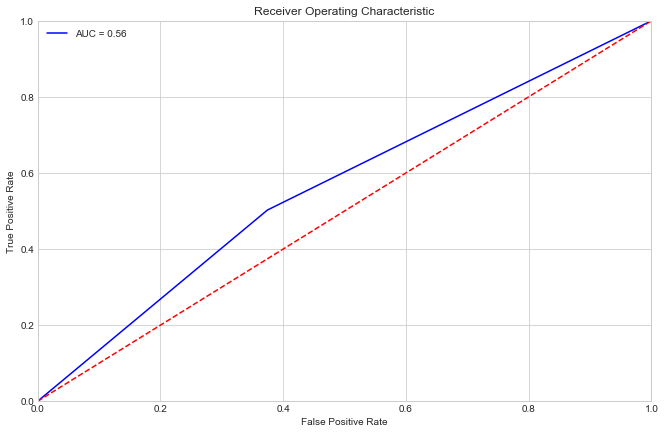

In [260]:
performance_eval(test_Y, test_pred_logreg, graph=True)

In [19]:
performance_eval(train_Y, train_pred_logreg)

Accuracy = 0.5754938064948109
Precision = 0.5823534460561325
Recall = 0.5089640687120246
Recall of class 0 (specificity) = 0.6409386068476978
Recall of class 1 (sensitivity) = 0.5089640687120246
Balanced accuracy = 0.5749513377798612
TN : 8686, FP : 4866, FN : 6546, TP : 6785
TN : 0.3231038202581557, FP : 0.18100658408659748, FN : 0.24349960941859167, TP : 0.25238998623665515


On remarque que les performances de la régression logistique sont légèrement supérieures sur l'échantillon d'apprentissage, ce qui révèle la présence de sur-apprentissage. Au vu du nombre de variables (et donc de paramètres estimés) inclues dans le modèle, cela était attendu. Pour pallier cet écueil nous mettons en place une régression logistique pénalisée par les normes $L_{1}$. 

--------------

## Regression logistique pénalisée

In [190]:
param_grid = {'C': [1,0.1,0.05,0.01,0.001]} 
pen_logreg = model_selection.GridSearchCV(LogisticRegression(penalty='l1', max_iter=3000,tol=0.01, 
                                                             solver='saga'), param_grid)
%time pen_logreg.fit(train_X, train_Y)

Wall time: 29.6 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=3000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.01, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.05, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [191]:
print(pen_logreg.best_estimator_)
train_pen_pred_logreg = pen_logreg.predict(train_X)
test_pen_pred_logreg = pen_logreg.predict(test_X)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)


Accuracy = 0.6359139038361395
Precision = 0.5516528925619835
Recall = 0.12433061699650756
Recall of class 0 (specificity) = 0.9399474193994742
Recall of class 1 (sensitivity) = 0.12433061699650756
Balanced accuracy = 0.5321390181979909
TN : 6793, FP : 434, FN : 3761, TP : 534
TN : 0.5895677833709425, FP : 0.03766707168894289, FN : 0.32641902447491755, TP : 0.04634612046519702


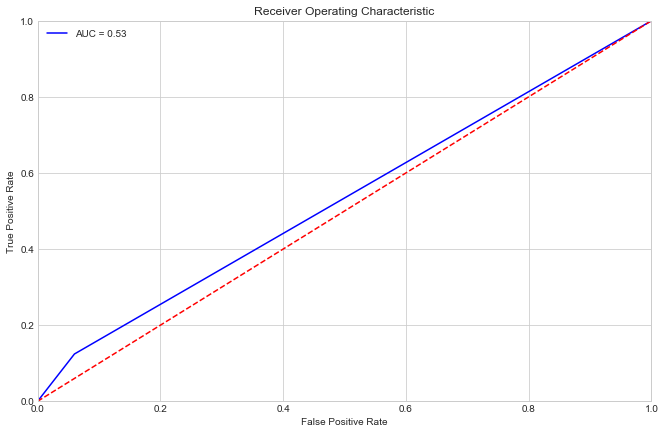

In [192]:
performance_eval(test_Y, test_pen_pred_logreg, graph=True)

In [23]:
performance_eval(train_Y, train_pen_pred_logreg)

Accuracy = 0.575642599412268
Precision = 0.5851563191922771
Recall = 0.4956117320531093
Recall of class 0 (specificity) = 0.6543683589138135
Recall of class 1 (sensitivity) = 0.4956117320531093
Balanced accuracy = 0.5749900454834614
TN : 8868, FP : 4684, FN : 6724, TP : 6607
TN : 0.3298738980024551, FP : 0.17423650634229812, FN : 0.25012089424543393, TP : 0.24576870140981288


Les performances de la régression logistique pénalisée sont très légèrement supérieures à celles du modèle logistique classique. Nous considérons toutefois cette différence comme non significative. Une des raisons pouvant expliquer l'absence d'amélioration tient au fait que la régression logistique, même pénalisée, ne capte que les relations linéaires présentent dans les données. Une solution consiste à explicitement modéliser des interactions entre variables. Se pose alors la question de savoir quelles interactions choisir et pourquoi. Une autre alternative consiste à utiliser des algorithmes capables de détecter et modéliser les relations non linéaires "par eux-mêmes". Nous optons pour cette seconde option car elle présente le double avantage de ne pas augmenter le nombre de variables et de ne pas introduire de biais lié aux choix des interactions par le modélisateur.

-------------

## Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
param_grid = {'n_estimators' : [500, 1000],
              'max_features' : [15,30,50],
              'min_samples_leaf' : [1,5]} 
rf_clf = model_selection.GridSearchCV(RandomForestClassifier(random_state = 1337, n_jobs=-1),
                                      param_grid, n_jobs=-1, verbose = 15)
%time rf_clf.fit(train_X, train_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

Wall time: 29min 45s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [36]:
print(rf_clf.best_estimator_)
train_pred_rf = rf_clf.predict(train_X)
test_pred_rf = rf_clf.predict(test_X)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1337, verbose=0,
                       warm_start=False)


Accuracy = 0.5721228953306717
Precision = 0.5637035596187512
Recall = 0.5188898836168307
Recall of class 0 (specificity) = 0.6221997641906687
Recall of class 1 (sensitivity) = 0.5188898836168307
Balanced accuracy = 0.5705448239037497
TN : 3694, FP : 2243, FN : 2687, TP : 2898
TN : 0.3206040617948273, FP : 0.19467106405137996, FN : 0.23320604061794828, TP : 0.2515188335358445


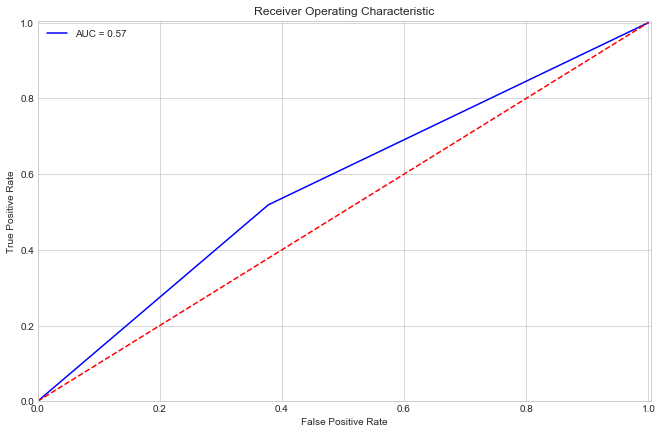

In [47]:
performance_eval(test_Y, test_pred_rf, graph=True)

In [50]:
performance_eval(train_Y, train_pred_rf, graph=False)

Accuracy = 0.9955362124762861
Precision = 0.9926903856194526
Recall = 0.9983497111994599
Recall of class 0 (specificity) = 0.9927685950413223
Recall of class 1 (sensitivity) = 0.9983497111994599
Balanced accuracy = 0.9955591531203911
TN : 13454, FP : 98, FN : 22, TP : 13309
TN : 0.5004649778670536, FP : 0.0036454264776996613, FN : 0.0008183610460142097, TP : 0.4950712346092326


Le modèle a très clairement overfitté. On construit alors un modèle encore plus pénalisant que le premier. 

In [49]:
param_grid = {'max_features' : [10,15,20],
              'min_samples_leaf' : [50,75,100,150]} 
rf_clf = model_selection.GridSearchCV(RandomForestClassifier(n_estimators = 500,random_state = 1337, 
                                                             n_jobs=-1), param_grid, n_jobs=-1, verbose = 15)
%time rf_clf.fit(train_X, train_Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.5s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.7s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.7s finished


Wall time: 27 s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [135]:
print(rf_clf.best_estimator_)
train_pred_rf = rf_clf.predict(train_X)
test_pred_rf = rf_clf.predict(test_X)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1337, verbose=0,
                       warm_start=False)


Accuracy = 0.5743794480124979
Precision = 0.5687184661957618
Recall = 0.5045658012533573
Recall of class 0 (specificity) = 0.6400538992757285
Recall of class 1 (sensitivity) = 0.5045658012533573
Balanced accuracy = 0.572309850264543
TN : 3800, FP : 2137, FN : 2767, TP : 2818
TN : 0.3298038534976567, FP : 0.1854712723485506, FN : 0.24014927963895158, TP : 0.24457559451484118


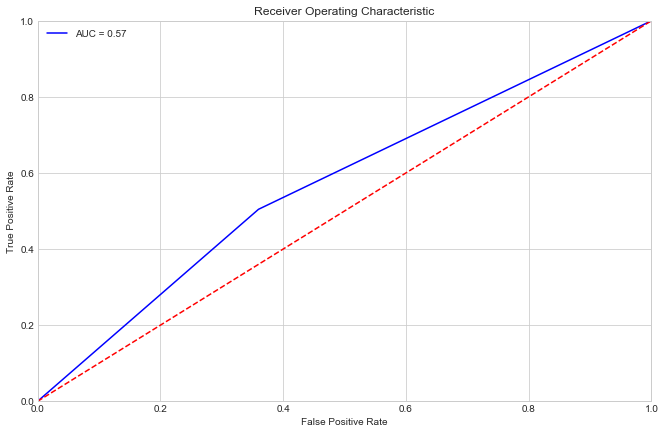

In [51]:
performance_eval(test_Y, test_pred_rf, graph=True)

In [59]:
performance_eval(train_Y, train_pred_rf, graph=False)

Accuracy = 0.6678198117769594
Precision = 0.6873244232570018
Recall = 0.6056559897982147
Recall of class 0 (specificity) = 0.728969893742621
Recall of class 1 (sensitivity) = 0.6056559897982147
Balanced accuracy = 0.6673129417704178
TN : 9879, FP : 3673, FN : 5257, TP : 8074
TN : 0.3674813078897444, FP : 0.13662909645500873, FN : 0.19555109176803184, TP : 0.30033850388721495


On sort le classement des variables :

In [120]:
temp = RandomForestClassifier(n_estimators = 500,random_state = 1337,max_features=10,min_samples_leaf=50
                              ,n_jobs=-1).fit(train_X, train_Y)

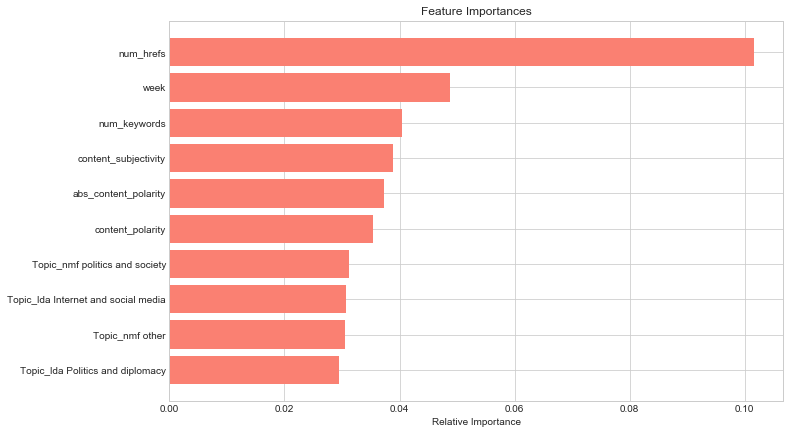

In [121]:
features = train_X.columns
importances = temp.feature_importances_
indices = np.argsort(importances)[-10:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='salmon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [56]:
del temp,features,importances,indices

---------------

## Gradient Boosting

In [15]:
from xgboost import XGBClassifier

In [52]:
param_grid = {'learning_rate': [0.1,0.05, 0.01], #so called `eta` value
              'max_depth': [4,7,9],
              'colsample_bytree': [1],
              'n_estimators': [400,500,800],
              'scale_pos_weight': [1.0]}
xgb_clf = model_selection.GridSearchCV(XGBClassifier(n_jobs=-1, random_state=1337), param_grid, n_jobs=-1, 
                   cv=model_selection.StratifiedKFold(n_splits=3), verbose=15)
xgb_clf.fit(train_X,train_Y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_b

In [53]:
print(xgb_clf.best_estimator_)
train_pred_xgb = xgb_clf.predict(train_X)
test_pred_xgb = xgb_clf.predict(test_X)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1337, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1.0, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


Accuracy = 0.5750737719145982
Precision = 0.5710455764075067
Recall = 0.4957923008057296
Recall of class 0 (specificity) = 0.6496547077648644
Recall of class 1 (sensitivity) = 0.4957923008057296
Balanced accuracy = 0.5727235042852971
TN : 3857, FP : 2080, FN : 2816, TP : 2769
TN : 0.3347509113001215, FP : 0.18052421454608575, FN : 0.2444020135393161, TP : 0.24032286061447666


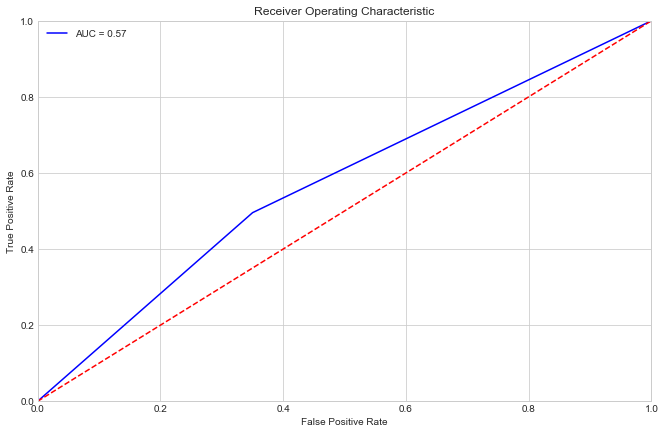

In [54]:
performance_eval(test_Y, test_pred_xgb, graph=True)

In [57]:
performance_eval(train_Y, train_pred_xgb,graph=False)

Accuracy = 0.6064427333258937
Precision = 0.6221906369370169
Recall = 0.5253919435901283
Recall of class 0 (specificity) = 0.6861717827626919
Recall of class 1 (sensitivity) = 0.5253919435901283
Balanced accuracy = 0.60578186317641
TN : 9299, FP : 4253, FN : 6327, TP : 7004
TN : 0.34590633485846073, FP : 0.15820406948629245, FN : 0.23535319718781386, TP : 0.26053639846743293


On sort le classements des variables :

In [118]:
temp = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1337, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1.0, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None).fit(train_X, train_Y)

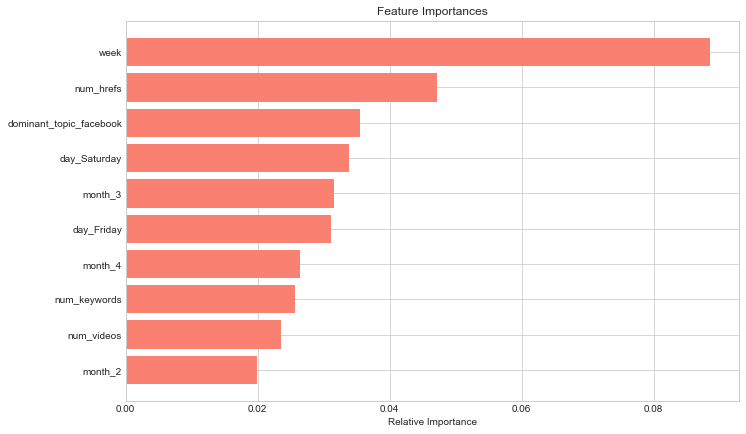

In [119]:
features = train_X.columns
importances = temp.feature_importances_
indices = np.argsort(importances)[-10:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='salmon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [115]:
indices = np.argsort(importances)[-10:]
indices

array([73,  1,  3, 75, 47, 74, 49, 57,  2,  4], dtype=int64)

In [ ]:
del temp,features,importances,indices

-------

## Diagnostic

In [221]:
pred_dataset = np.transpose(np.vstack((train_Y,train_pred_logreg,train_pen_pred_logreg,train_pred_rf,
                                       train_pred_xgb)))
pred_dataset = pd.DataFrame(pred_dataset, columns=['train_Y','train_pred_logreg','train_pen_pred_logreg',
                                                   'train_pred_rf','train_pred_xgb'])
print(pred_dataset.shape)
pred_dataset.head(3)

(26883, 5)


,train_Y,train_pred_logreg,train_pen_pred_logreg,train_pred_rf,train_pred_xgb
0,0,0,0,0,0
1,1,0,0,1,1
2,0,0,0,0,0


In [222]:
pred_dataset['log_error'] = np.where((pred_dataset['train_Y']==pred_dataset['train_pred_logreg'])
                                     , 0, 1)
pred_dataset['pen_log_error'] = np.where((pred_dataset['train_Y']==pred_dataset['train_pen_pred_logreg'])
                                     , 0, 1)
pred_dataset['rf_error'] = np.where((pred_dataset['train_Y']==pred_dataset['train_pred_rf'])
                                     , 0, 1)
pred_dataset['xgb_error'] = np.where((pred_dataset['train_Y']==pred_dataset['train_pred_xgb'])
                                     , 0, 1)
pred_dataset['indicator'] = pred_dataset.iloc[:,-4:].sum(axis=1)
pred_dataset.head()

,train_Y,train_pred_logreg,train_pen_pred_logreg,train_pred_rf,train_pred_xgb,log_error,pen_log_error,rf_error,xgb_error,indicator
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,1,0,0,2
2,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,1,1,0,3
4,0,1,0,1,1,1,0,1,1,3


In [223]:
pred_dataset['indicator'].value_counts()

0    10954
2     5117
4     5069
1     3175
3     2568
Name: indicator, dtype: int64

In [234]:
diag = data[data.index.isin(pred_dataset[pred_dataset['indicator'] > 2].index)]

In [262]:
diag.describe(percentiles=np.arange(0.1, 1, 0.2))

,shares,nb_images,num_videos,num_hrefs,num_keywords,Topic_nmf other,Topic_nmf family and job,Topic_nmf web,Topic_nmf apple,Topic_nmf twitter,...,Topic_lda Internet and social media,Topic_lda Videos and movies,Topic_lda Telecomunication devices,Topic_lda Entertainment,content_polarity,abs_content_polarity,content_subjectivity,title_polarity,abs_title_polarity,title_subjectivity
count,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,...,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,3561.718345,5.586094,1.261228,11.163415,7.270525,0.045079,0.010697,0.037731,0.021272,0.029671,...,0.286375,0.043926,0.209443,0.302451,0.129754,0.138104,0.458966,0.073161,0.153274,0.271877
std,11477.435361,9.162569,4.199763,11.390711,1.912200,0.068638,0.178498,0.078617,0.087702,0.096964,...,0.346630,0.062140,0.305021,0.342331,0.096556,0.084179,0.090710,0.264306,0.227410,0.323055
min,63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009000,0.010000,0.010000,0.011000,-0.402778,0.000000,0.100000,-1.000000,0.000000,0.000000
10%,705.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021000,0.019000,0.020000,0.021000,0.017926,0.035553,0.348721,-0.125000,0.000000,0.000000
30.0%,1000.000000,1.000000,0.000000,5.000000,6.000000,0.006000,0.000000,0.000000,0.000000,0.000000,...,0.027000,0.023000,0.025000,0.026000,0.085654,0.088957,0.415722,0.000000,0.000000,0.000000
50%,1500.000000,2.000000,0.000000,8.000000,7.000000,0.022000,0.000000,0.009000,0.000000,0.001000,...,0.035000,0.027000,0.031000,0.034000,0.126806,0.128293,0.457716,0.000000,0.000000,0.100000
50.00000000000001%,1500.000000,2.000000,0.000000,8.000000,7.000000,0.022000,0.000000,0.009000,0.000000,0.001000,...,0.035000,0.027000,0.031000,0.034000,0.126806,0.128293,0.457716,0.000000,0.000000,0.100000
70%,2400.000000,4.000000,1.000000,12.000000,8.000000,0.046000,0.004000,0.034000,0.006000,0.011000,...,0.446200,0.031000,0.172000,0.523000,0.171408,0.172413,0.500066,0.100000,0.200000,0.454545
90.00000000000001%,6500.000000,15.000000,2.000000,23.000000,10.000000,0.121000,0.021000,0.104000,0.038000,0.071400,...,0.892000,0.065000,0.853400,0.867000,0.244304,0.245689,0.566667,0.478333,0.500000,0.766667


In [263]:
data.describe(percentiles=np.arange(0.1, 1, 0.2))

,shares,nb_images,num_videos,num_hrefs,num_keywords,Topic_nmf other,Topic_nmf family and job,Topic_nmf web,Topic_nmf apple,Topic_nmf twitter,...,Topic_lda Internet and social media,Topic_lda Videos and movies,Topic_lda Telecomunication devices,Topic_lda Entertainment,content_polarity,abs_content_polarity,content_subjectivity,title_polarity,abs_title_polarity,title_subjectivity
count,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,...,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000
mean,3375.151829,5.242260,1.253405,10.864939,7.212524,0.047265,0.010312,0.034800,0.020853,0.027210,...,0.260201,0.044896,0.185030,0.309134,0.123105,0.132329,0.457669,0.066043,0.152963,0.275635
std,11252.838523,8.454421,4.114982,11.332306,1.907761,0.073979,0.139642,0.077004,0.091052,0.094953,...,0.336872,0.064657,0.291405,0.346558,0.096715,0.083651,0.091157,0.265979,0.227395,0.326693
min,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009000,0.010000,0.010000,0.011000,-0.402778,0.000000,0.000000,-1.000000,0.000000,0.000000
10%,708.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021000,0.019000,0.020000,0.021000,0.008305,0.030808,0.345934,-0.150000,0.000000,0.000000
30.0%,1000.000000,1.000000,0.000000,5.000000,6.000000,0.007000,0.000000,0.000000,0.000000,0.000000,...,0.026000,0.023000,0.025000,0.026000,0.077305,0.081789,0.413974,0.000000,0.000000,0.000000
50%,1400.000000,2.000000,0.000000,7.000000,7.000000,0.023000,0.000000,0.007000,0.000000,0.000000,...,0.033000,0.027000,0.029000,0.035000,0.121465,0.123316,0.457052,0.000000,0.000000,0.100000
50.00000000000001%,1400.000000,2.000000,0.000000,7.000000,7.000000,0.023000,0.000000,0.007000,0.000000,0.000000,...,0.033000,0.027000,0.029000,0.035000,0.121465,0.123316,0.457052,0.000000,0.000000,0.100000
70%,2300.000000,4.000000,1.000000,12.000000,8.000000,0.048000,0.004000,0.031000,0.006000,0.010000,...,0.374000,0.031000,0.043000,0.543000,0.166526,0.167434,0.499468,0.100000,0.200000,0.454545
90.00000000000001%,6200.000000,15.000000,2.000000,23.000000,10.000000,0.125000,0.023000,0.098000,0.035000,0.064000,...,0.889000,0.070000,0.812000,0.871000,0.239153,0.240000,0.567172,0.437500,0.500000,0.800000
